<a href="https://colab.research.google.com/github/ArthurGaleev/NV/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Structure:**
* ***Demo*** (how to run `train.py` and `synthesize.py` with different arguments)
* ***Analysis*** (with demonstration of generated audio and specs)
    * Inner
    * External Dataset
    * Full-TTS system

## Demo

Cloning repo and installing requiered packages:

In [1]:
!git clone https://github.com/ArthurGaleev/NV.git

Cloning into 'NV'...
remote: Enumerating objects: 731, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 731 (delta 52), reused 47 (delta 22), pack-reused 630 (from 1)
Receiving objects: 100% (731/731), 116.90 KiB | 10.63 MiB/s, done.
Resolving deltas: 100% (467/467), done.


In [2]:
%cd NV
%pip install -r requirements.txt -q

/content/NV
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.6 MB/s eta 0:0

In [3]:
# some warnings occured without this, but it is not crucial
%pip uninstall -y tensorflow protobuf -q
%pip install -q tensorflow protobuf -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.33.2 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.33.2 which is incompatible.


### `train.py`

Model training was using the following env variables, you can specify your own (their setting vary on your system). **Without them `train.py` will be running as well** (you only need to choose option `(3) Don't visualize my results` for `wandb` when it asks in command line during the trainig), but without logging to `wandb` (was used for metrics logging) and `huggingface` (used to save model checkpoints).

Nevertheless `YANDEX_DISK_URL` is still specified for downloading a tiny test dataset (5 samples), `HYDRA_FULL_ERROR` for displaying full hydra errors:

In [4]:
# from google.colab import userdata
# import wandb
# from huggingface_hub import login
import os

os.environ["HYDRA_FULL_ERROR"] = "1"
os.environ['YANDEX_DISK_URL'] = "https://disk.360.yandex.ru/d/Mzh9T9OEZKSsww"
# os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")
# login(token=os.environ["HF_TOKEN"])
# wandb.login(key=userdata.get("WANDB_API_KEY"))

Model is firstly setting up a lot: donwloading WV-MOS checkpoint for MOS score estimation, LJSPeech dataset, then making a crop dataset of $8192$ length chunks.

Final model was trained as follows (except `wandb.writer`, that was set to `online` with specifying the env variable above):

In [5]:
!python train.py writer.mode=disabled model=hifi_gan_v2 dataloader.train.batch_size=64

/usr/local/lib/python3.12/dist-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()
2025-12-10 19:03:01.954910: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Weights downloaded in: /root/.cache/wv_mos/wv_mos.ckpt Size: 378728387
Logging git commit and patch...
wandb: (1) Create a W&B accou

### `synthesize.py`

Loading final model checkpoint from hf:

In [9]:
from huggingface_hub import hf_hub_download

repo_id = "ArthurGaleev/HiFi-GAN-v2"
filename = "HiFi-GAN-v2.3-epoch35.pth"

pth_path = hf_hub_download(repo_id=repo_id, filename=filename, local_dir="/content/NV/data/saved")

HiFi-GAN-v2.3-epoch35.pth:   0%|          | 0.00/424M [00:00<?, ?B/s]

**`synthesize.py` arguments:**
- `inferencer.from_pretrained` (str): path to the pretrained model.
- `inferencer.dataset_name` (str): name of the dataset to run inference on:
    - it should point to a dataset folder name, placed in `data\datasets` dir.
    - `data\datasets\dataset_name` should contain at least one of the following folders: `wavs` or `gt_audio` folder with audio in `.wav` format; `transcriptions` folder with texts in `.txt` format (they will be used when `use_text2mel=True`).
- `inferencer.texts_query` (str): one string of text in the format `'"your text"'` to run inference on (demonstrated in the end of demo), **it is not working for multiple lines**, e.g. multiple texts for now (maybe hydra limitations).
- `inferencer.use_text2mel` (bool): whether to use pretrained text2mel Tacotron2 model from [speechbrain](https://huggingface.co/speechbrain/tts-tacotron2-ljspeech).
- `+datasets.test.limit` (int): limit the number of samples of the dataset.


**Important notes:**

* Generated audio **will be placed** in `data\saved\synthesized\dataset_name` folder. While if `use_text2mel=True` folder would have `_text2mel` suffix at the end of `dataset_name`.

* If `texts_query` is set, the `dataset_name` **will be ignored** and generated audio will be placed in `data\saved\synthesized\query_data` folder.

* If `dataset_name` is set to `LJSpeech-1.1`, than it will be automatically downloaded into `data\datasets`, if it isn't there already. The default `dataset_name` is set to `test_data`, which is for the dataset from that `YANDEX_DISK_URL`, it will also be automatically downloaded.

* **MOS score** by fine-tuned wav2vec2.0 model from [repo](https://github.com/AndreevP/wvmos) is calculated automatically as the average of MOS on each generated audio.

You can run synthesize.py in the following ways (each line outputs will be used then in `Analysis` section):

#### Running without `text2mel`, e.g.

`audio_real -> mel_spec -> HiFi-GAN-v2.3(mel_spec) -> audio_fake`

On `test_data`:

In [11]:
# -W ignore is set to silence some warnings, mainly from torchaudio future deprecations
!python -W ignore synthesize.py inferencer.from_pretrained="/content/NV/data/saved/HiFi-GAN-v2.3-epoch35.pth"

2025-12-10 19:22:20.925110: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Loading model weights from: /content/NV/data/saved/HiFi-GAN-v2.3-epoch35.pth ...
synthesize: 100% 5/5 [00:02<00:00,  2.37it/s]
    test_MOS       : -0.6766279533505439


On `LJSpeech-1.1` 10 samples:

In [12]:
!python -W ignore synthesize.py inferencer.dataset_name=LJSpeech-1.1 +datasets.test.limit=10 inferencer.from_pretrained="/content/NV/data/saved/HiFi-GAN-v2.3-epoch35.pth"

2025-12-10 19:22:53.645752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Loading model weights from: /content/NV/data/saved/HiFi-GAN-v2.3-epoch35.pth ...
synthesize: 100% 10/10 [00:01<00:00,  6.65it/s]
    test_MOS       : 1.2273823857307433


#### Running with `text2mel`, e.g.

`text_real -> Tacotron2(text_real) -> mel_spec -> HiFi-GAN-v2.3(mel_spec) -> audio_fake`

On `test_data`:

In [13]:
!python -W ignore synthesize.py inferencer.use_text2mel=True inferencer.from_pretrained="/content/NV/data/saved/HiFi-GAN-v2.3-epoch35.pth"

2025-12-10 19:23:16.428126: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[2025-12-10 19:23:22,377][speechbrain.utils.fetching][INFO] - Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/tts-tacotron2-ljspeech' if not cached
hyperparams.yaml: 2.20kB [00:00, 9.10MB/s]
[2025-12-10 19:23:22,581][speechbrain.utils.fetching][INFO] - Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/tts-tacotron2-ljspeech' if not cached
[2025-12-10 19:23:22,968][speechbrain.utils.parameter_transfer][DEBUG] - Fetching files for pretraining (no collection directory set)
[2025-12-10 19:23:22,969][speechbrain.utils.fetching][INFO] - Fetch model.ckpt: Fetching from HuggingFace Hub 'speechbrain/tts-tacotron2-ljspeech' if not cached
model.ckpt: 100% 113M/1

On `LJSpeech-1.1` 10 samples:

In [14]:
!python -W ignore synthesize.py inferencer.use_text2mel=True inferencer.dataset_name=LJSpeech-1.1 +datasets.test.limit=10 inferencer.from_pretrained="/content/NV/data/saved/HiFi-GAN-v2.3-epoch35.pth"

2025-12-10 19:24:22.495840: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Parsing metadata.csv into transcriptions folder...
[2025-12-10 19:24:29,831][speechbrain.utils.fetching][INFO] - Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/tts-tacotron2-ljspeech' if not cached
[2025-12-10 19:24:30,004][speechbrain.utils.fetching][INFO] - Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/tts-tacotron2-ljspeech' if not cached
[2025-12-10 19:24:30,355][speechbrain.utils.parameter_transfer][DEBUG] - Fetching files for pretraining (no collection directory set)
[2025-12-10 19:24:30,355][speechbrain.utils.fetching][INFO] - Fetch model.ckpt: Fetching from HuggingFace Hub 'speechbrain/tts-tacotron2-ljspeech' if not cached
[2025-12-10 19:

On custom text, e.g. `texts_query`:

In [15]:
!python -W ignore synthesize.py inferencer.from_pretrained="/content/NV/data/saved/HiFi-GAN-v2.3-epoch35.pth" inferencer.texts_query='"Hello world! Welcome to the Deep Learning for Audio course!"'

2025-12-10 19:25:21.474539: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
inferencer.use_text2mel is manually set to True, because for specified texts_query it is obligatory
Creating dataset with transcriptions from texts_query
[2025-12-10 19:25:27,972][speechbrain.utils.fetching][INFO] - Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/tts-tacotron2-ljspeech' if not cached
[2025-12-10 19:25:28,156][speechbrain.utils.fetching][INFO] - Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/tts-tacotron2-ljspeech' if not cached
[2025-12-10 19:25:28,505][speechbrain.utils.parameter_transfer][DEBUG] - Fetching files for pretraining (no collection directory set)
[2025-12-10 19:25:28,505][speechbrain.utils.fetching][INFO] - Fetch model

## Analysis

In two cells below there is an `get_synthesized_audio` to obtain an `audio` list of dicts, where all synthesized audio from one of `SynthFolders` are stored, you can select one of default dataset, and then show spec&audio of $i$-th audio by passing `audio[i]["audio_fake"]` to `plot_spec_audio` function.

In [17]:
import torchaudio
import warnings
import torch.nn as nn
from pathlib import Path

ROOT_PATH = Path("/content/NV")

# ignore some warnings, mainly for torchaudio deprecation ones
warnings.filterwarnings("ignore", category=UserWarning)

class SynthFolders():
    def __init__(self):
        self.ljspeech = "LJSpeech-1.1"
        self.ljspeech_text2mel = "LJSpeech-1.1_text2mel"
        self.test_data = "test_data"
        self.test_data_text2mel = "test_data_text2mel"
        self.query_data_text2mel = "query_data_text2mel"

synth_folders = SynthFolders()
synthesized_path = ROOT_PATH / "data" / "saved" / "synthesized"


def get_synthesized_audio(syntesized_folder):
    syntesized_audio_path = synthesized_path / syntesized_folder
    audio = [
        {
            'audio_fake': torchaudio.load(path)[0],
            'audio_fake_path': path
        }
        for path in syntesized_audio_path.iterdir()
    ]
    return audio

In [22]:
from dataclasses import dataclass

import librosa
import torch
import torchaudio
from torch import nn


@dataclass
class MelSpectrogramConfig:
    sr: int = 22050
    win_length: int = 1024
    hop_length: int = 256
    n_fft: int = 1024
    f_min: int = 0
    f_max: int = 8000
    n_mels: int = 80
    power: float = 1.0

class MelSpectrogram(nn.Module):
    def __init__(self, config: MelSpectrogramConfig):
        super(MelSpectrogram, self).__init__()

        self.config = config

        self.mel_spectrogram = torchaudio.transforms.MelSpectrogram(
            sample_rate=config.sr,
            win_length=config.win_length,
            hop_length=config.hop_length,
            n_fft=config.n_fft,
            f_min=config.f_min,
            f_max=config.f_max,
            n_mels=config.n_mels,
            center=False,
            pad=(config.win_length - config.hop_length) // 2
        )

        # The is no way to set power in constructor in 0.5.0 version.
        self.mel_spectrogram.spectrogram.power = config.power

    def forward(self, audio: torch.Tensor) -> torch.Tensor:
        """
        :param audio: Expected shape is [B, T]
        :return: Shape is [B, n_mels, T']
        """
        mel = self.mel_spectrogram.to(audio.device)(audio).clamp_(min=1e-5).log_()

        return mel

In [23]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display

get_mel_spec = MelSpectrogram(MelSpectrogramConfig)

def plot_spec_audio(audio, title_suffix=""):
        """
        Plot spec and audio

        Args:
            audio (Tensor): audio to plot it's audio&spec
            title_suffix (str): title suffix above the mel spec plot
        """
        mel_spec = get_mel_spec(audio)

        print(f"Audio {title_suffix} shape: {audio.shape}")
        print(f"Mel spectrogram {title_suffix} shape: {mel_spec.shape}")

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(
            mel_spec.squeeze().numpy(),
            sr=22050,
            x_axis='time',
            y_axis='mel',
            hop_length=256,
            cmap='magma'
        )
        plt.title(f'Mel Spectrogram {title_suffix}')
        plt.tight_layout()
        plt.show()

        display(Audio(audio.numpy(), rate=22050, normalize=False))

Audio  shape: torch.Size([1, 142848])
Mel spectrogram  shape: torch.Size([1, 80, 558])


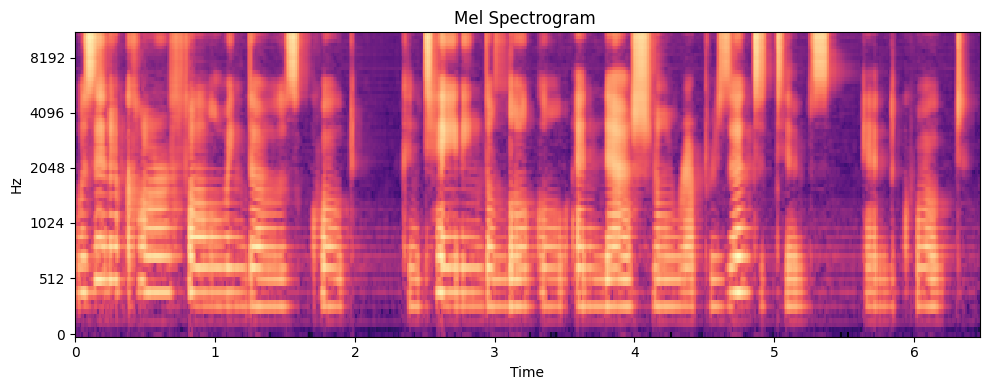

In [24]:
audio = get_synthesized_audio(synth_folders.ljspeech)
plot_spec_audio(audio[0]['audio_fake'])

The following function is a helper for plotting real / fake / fake_text2mel audio at once:

In [25]:
def show3_spec_audio(audio_fake, audio_fake_path, show_real=False, show_fake_text2mel=False):
    """
    Show spec and audio for audio_fake and it's real and fake_text2mel analogues if possible

    Args:
        audio_fake (Tensor): fake audio to plot it's spec&audio, but can be just an audio
        audio_fake_path (Path): pathlib path to the audio
        show_real (bool): whether show the corresponding to (fake)audio, real audio's spec&audio
        show_fake_text2mel (bool): whether show the corresponding to (fake)audio, fake text2mel audio's spec&audio
    """

    # plotting real spec&audio
    if show_real:
        real_path = ROOT_PATH / "data" / "datasets" / audio_fake_path.parent.name.removesuffix('_text2mel')
        if (real_path / "wavs").exists():
            real_path = real_path / "wavs"
            real_audio, sr = torchaudio.load(real_path / audio_fake_path.name)
            if sr != 22050:
                real_audio = torchaudio.functional.resample(real_audio, sr, 22050)
            plot_spec_audio(real_audio[0, :], title_suffix="(real)")
        elif (real_path / "gt_audio").exists():
            real_path = real_path / "gt_audio"
            real_audio, sr = torchaudio.load(real_path / audio_fake_path.name)
            if sr != 22050:
                real_audio = torchaudio.functional.resample(real_audio, sr, 22050)
            plot_spec_audio(real_audio[0, :], title_suffix="(real)")
        else:
            print("real audio is not shown, beacause it's file is not found in expected path")

    # plotting fake spec&audio
    plot_spec_audio(audio_fake, title_suffix="(fake)" if show_real else "")

    # plotting fake text2mel spec&audio
    if show_fake_text2mel:
        fake_text2mel_path = ROOT_PATH / "data" / "saved" / "synthesized" / (audio_fake_path.parent.name.removesuffix('_text2mel') + '_text2mel')
        real_audio, sr = torchaudio.load(fake_text2mel_path / audio_fake_path.name)
        if sr != 22050:
            real_audio = torchaudio.functional.resample(real_audio, sr, 22050)
        plot_spec_audio(real_audio, title_suffix="(fake text2mel)")

### Inner-Analysis

In [26]:
audio = get_synthesized_audio(synth_folders.ljspeech)

Audio (real) shape: torch.Size([143005])
Mel spectrogram (real) shape: torch.Size([80, 558])


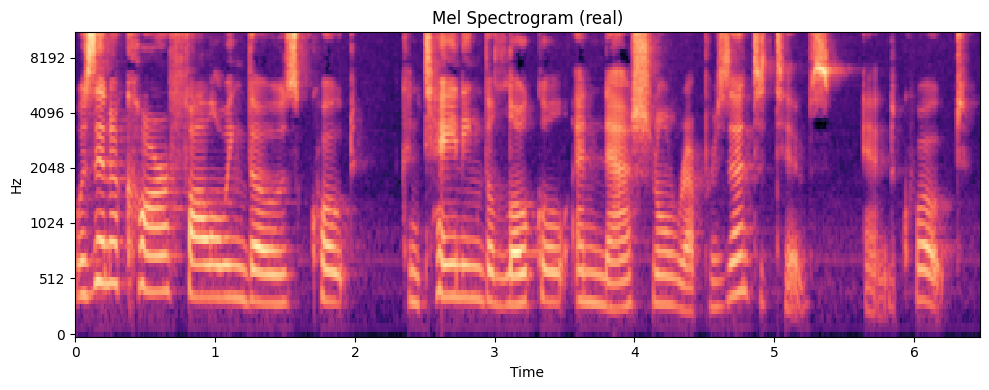

Audio (fake) shape: torch.Size([1, 142848])
Mel spectrogram (fake) shape: torch.Size([1, 80, 558])


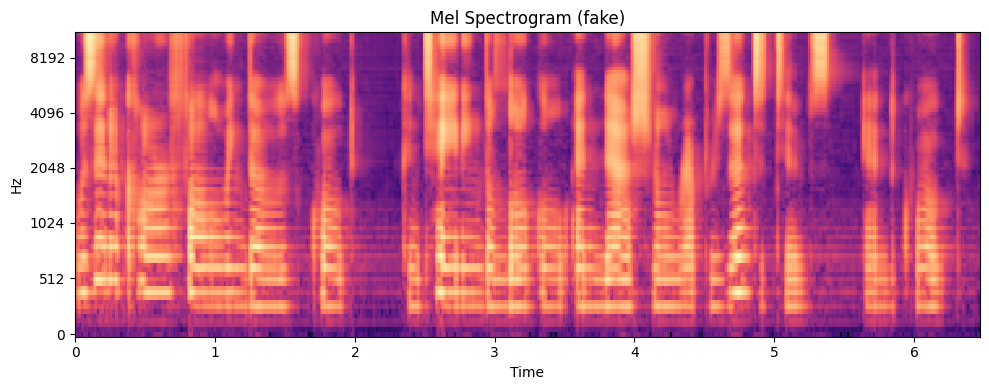

In [27]:
show3_spec_audio(**audio[0], show_real=True)

**Наблюдения:**

К сожалению, прям слышно голос робота, по mel спекам также заметно (не так сильно), что в fake волны достаточно "прямые", ровные, а в настоящей более плавные.

### External Dataset Analysis

In [28]:
audio = get_synthesized_audio(synth_folders.test_data)

Audio (real) shape: torch.Size([363825])
Mel spectrogram (real) shape: torch.Size([80, 1421])


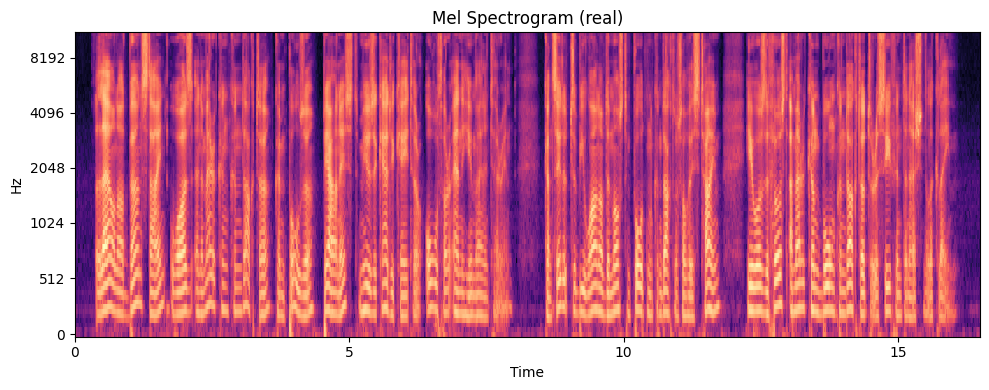

Audio (fake) shape: torch.Size([1, 363776])
Mel spectrogram (fake) shape: torch.Size([1, 80, 1421])


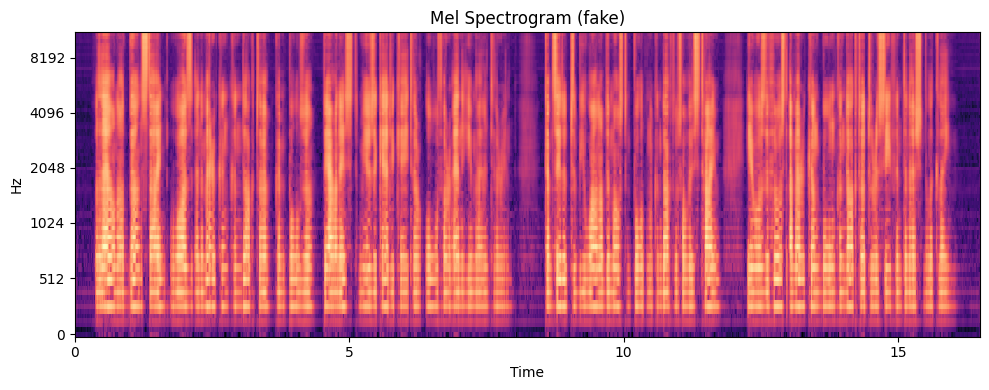

In [29]:
show3_spec_audio(**audio[0], show_real=True)

**Наблюдения:**

Получилось примерно также, MOS score (подсчитан в предыдущем разделе) оказался заметно выше, по звук, возможно, тоже немного лучше.

### Full-TTS system Analysis

Audio (real) shape: torch.Size([143005])
Mel spectrogram (real) shape: torch.Size([80, 558])


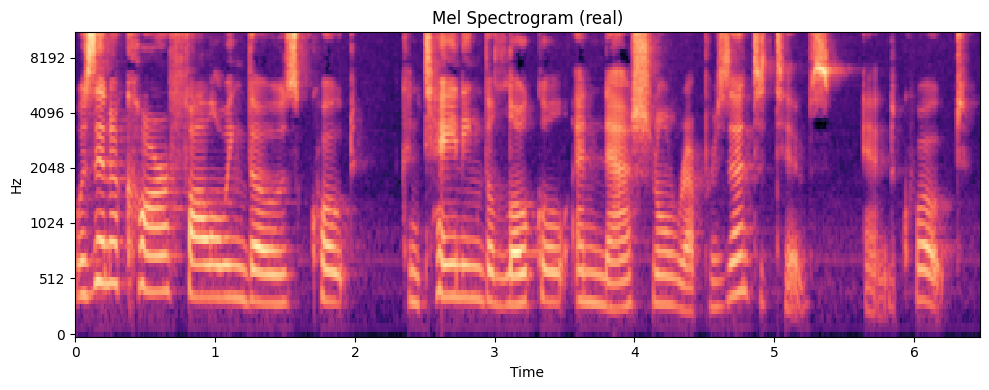

Audio (fake) shape: torch.Size([1, 129792])
Mel spectrogram (fake) shape: torch.Size([1, 80, 507])


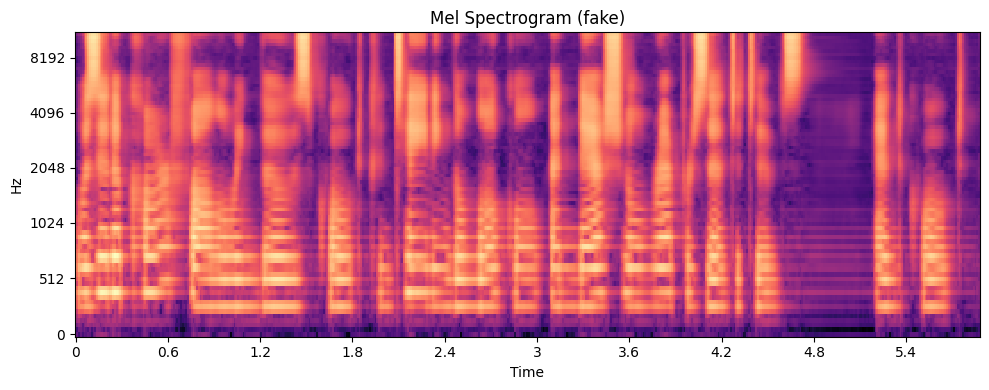

Audio (fake text2mel) shape: torch.Size([1, 129792])
Mel spectrogram (fake text2mel) shape: torch.Size([1, 80, 507])


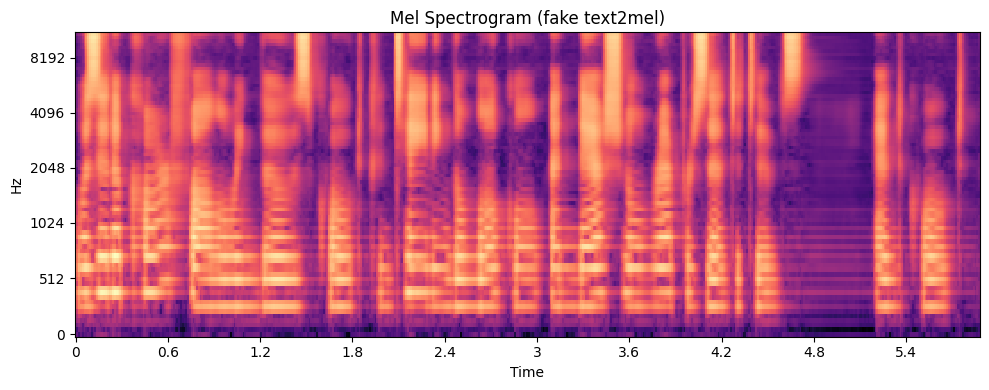

In [30]:
audio = get_synthesized_audio(synth_folders.ljspeech_text2mel)
show3_spec_audio(**audio[0], show_real=True, show_fake_text2mel=True)

Audio (real) shape: torch.Size([363825])
Mel spectrogram (real) shape: torch.Size([80, 1421])


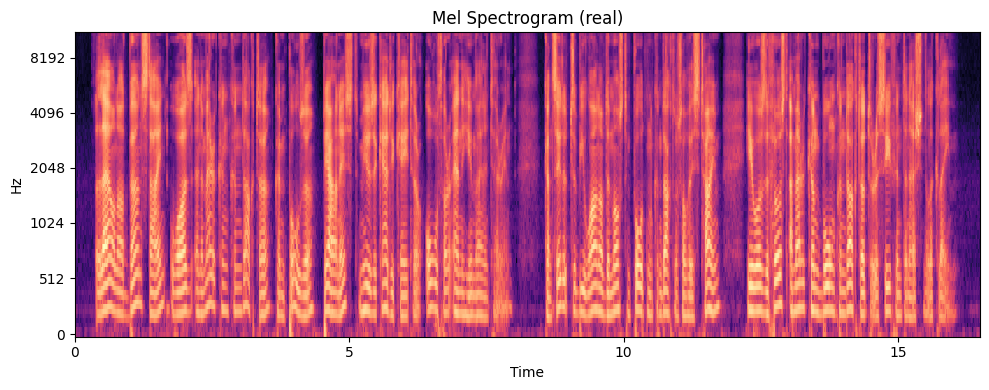

Audio (fake) shape: torch.Size([1, 256000])
Mel spectrogram (fake) shape: torch.Size([1, 80, 1000])


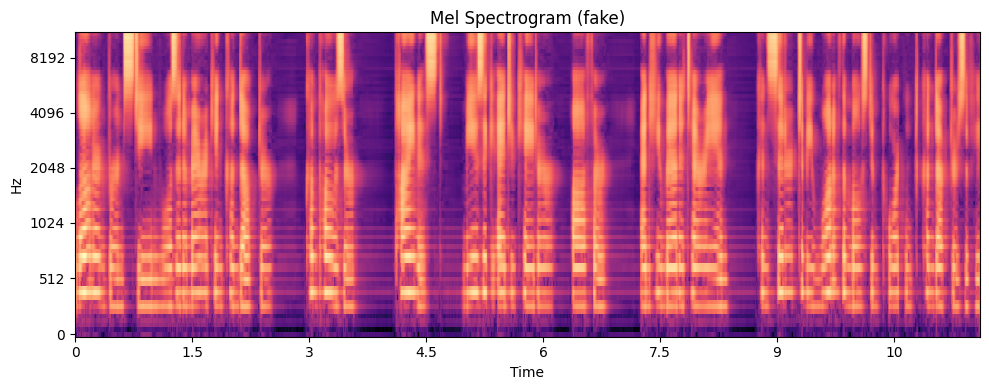

Audio (fake text2mel) shape: torch.Size([1, 256000])
Mel spectrogram (fake text2mel) shape: torch.Size([1, 80, 1000])


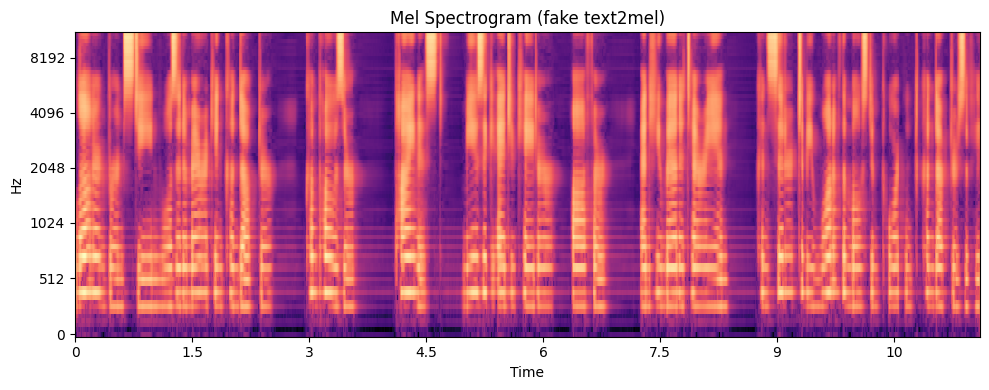

In [31]:
audio = get_synthesized_audio(synth_folders.test_data_text2mel)
show3_spec_audio(**audio[0], show_real=True, show_fake_text2mel=True)

**Наблюдения:**

Генерации с `text2mel` моделью звучат более четко, громко.

Заметил, что (надеюсь это не моя ошибка) при генерации с `text2mel`, то есть вообще по сути та задача которую мы хотим решать, аудио получаются обрезанные, то есть конец текста может быть не озвучен, скорее всего так как mel спека в модели `text2mel` фиксированного размера, но это вроде просто решается каким-то паддингом исходного текста.

А так, действительно неплохо получилось, даже с робовойсом, но можно озвучить любой текст, правда только на английском.

## P.S.

Audio  shape: torch.Size([1, 79616])
Mel spectrogram  shape: torch.Size([1, 80, 311])


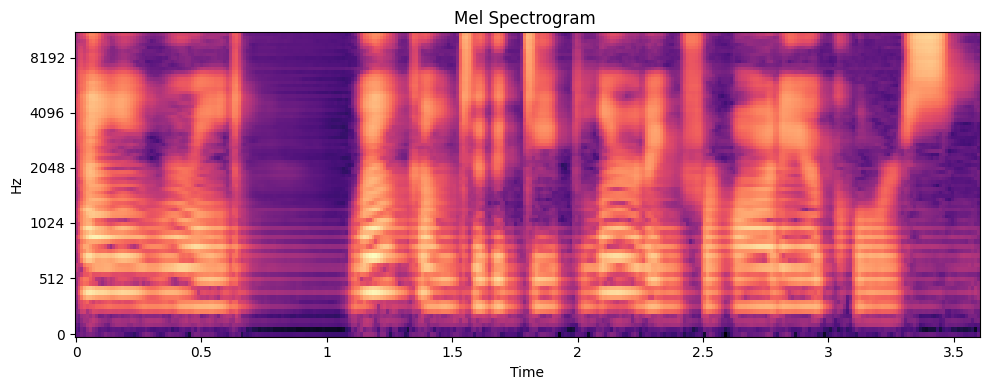

In [32]:
audio = get_synthesized_audio(synth_folders.query_data_text2mel)
show3_spec_audio(**audio[0])